# Load Dataset

In [31]:
#Load packages
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Load Dataset

path = r"C:\Users\iness\OneDrive\Ambiente de Trabalho\Master\Master Data Science\Second Semester\Data Mining, Machine Learning and Deep Learning\Final Exam\MachineLearning\Dataset\ArASL_Database_54K_Final"

images = []
labels = []

for folder_name in os.listdir(path):
    folder_path = os.path.join(path, folder_name)
    if not os.path.isdir(folder_path):
        continue
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg") or file_name.endswith(".png"):
            image_path = os.path.join(folder_path, file_name)
            if os.path.isfile(image_path):
                with Image.open(image_path) as image:
                    images.append(image.copy())
                labels.append(folder_name)

df = pd.DataFrame({'image': images, 'label': labels})



# EDA

### Check Class Distribution

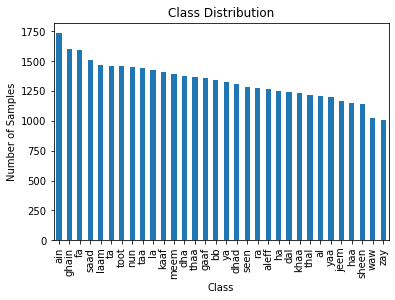

In [4]:
# Count the number of samples for each class
class_counts = df['label'].value_counts()

# Plot a bar chart of the class distribution
fig, ax = plt.subplots()
class_counts.plot(kind='bar', ax=ax)
ax.set_title('Class Distribution')
ax.set_xlabel('Class')
ax.set_ylabel('Number of Samples')
plt.show()


### Check Image Size Distribution

In [ ]:
import matplotlib.pyplot as plt

# Get the sizes of all images
image_sizes = [img.size for img in images]

# Plot a histogram of the image sizes
plt.hist(image_sizes, bins=50)
plt.title('Image Size Distribution')
plt.xlabel('Image Size (pixels)')
plt.ylabel('Frequency')
plt.show()

KeyboardInterrupt: 

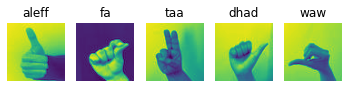

In [9]:
# Randomly select some images from the dataset
num_images = 5
image_indices = np.random.choice(range(len(df)), num_images)

# Loop through the selected images and display them
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(df['image'][image_indices[i]])
    plt.title(df['label'][image_indices[i]])
    plt.axis('off')

plt.show()

### Color Channel Analysis

In [12]:
def get_channel_means(image):
    return np.mean(np.array(image))


In [13]:
# Initialize a list to store the mean pixel intensity of each color channel
channel_means = []

# Loop through the images in the dataset and calculate the channel means
for i in range(len(df)):
    image = df['image'][i]
    channel_means.append(get_channel_means(image))

# Convert the channel means to a numpy array and calculate the mean and standard deviation for the channel
channel_means = np.array(channel_means)
mean_intensity = np.mean(channel_means)
std_intensity = np.std(channel_means)

# Print the mean and standard deviation for the channel
print("Mean pixel intensity: {:.2f}".format(mean_intensity))
print("Standard deviation of pixel intensity: {:.2f}".format(std_intensity))


Mean pixel intensity: 175.49
Standard deviation of pixel intensity: 34.75


### Outlier Detection

In [20]:
# Create an empty list to store outlier image indexes
outlier_indexes = []

# Loop through each image in the dataset
for i in range(len(df)):
    # Convert the image to a numpy array
    image = np.array(df.loc[i, 'image'])
    
    # Calculate the minimum and maximum pixel values of the image
    min_val = np.min(image)
    max_val = np.max(image)
    
    # Define a threshold for outlier detection
    threshold = 10
    
    # Check if the minimum or maximum pixel value is below the threshold
    if min_val < threshold or max_val < threshold:
        # Add the image index to the outlier list
        outlier_indexes.append(i)

# Print the number of detected outliers and their indexes
print(f"Detected {len(outlier_indexes)} outlier images with indexes: {outlier_indexes}")


Detected 9720 outlier images with indexes: [166, 168, 169, 221, 236, 258, 392, 393, 394, 395, 396, 397, 514, 515, 516, 517, 518, 519, 520, 521, 522, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 535, 536, 537, 538, 539, 733, 735, 736, 737, 738, 739, 740, 741, 742, 745, 746, 747, 748, 749, 750, 751, 752, 753, 755, 756, 757, 758, 947, 949, 953, 956, 957, 982, 983, 984, 986, 987, 989, 990, 991, 992, 993, 994, 995, 997, 998, 999, 1000, 1001, 1002, 1003, 1006, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1019, 1020, 1021, 1022, 1023, 1027, 1028, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1329, 1332, 1333, 1428, 1487, 14

# ETL

In [36]:
from keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator class with specified parameters
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1,
                             height_shift_range=0.1, zoom_range=0.1, 
                             horizontal_flip=True, vertical_flip=False)

# Fit the data generator to the training data
datagen.fit(df['image'])

# Generate augmented images
augmented_images = datagen.flow(df['image'], batch_size=32, shuffle=False)

# Concatenate the original and augmented images and labels
augmented_df = pd.concat([df, pd.DataFrame({'image':augmented_images[0][0], 'label':df['label']})])


RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: initialization failed